In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Titanicdataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Unnamed: 12    891
dtype: int64

 From above output we can visualize there was missing values(NAN) in features(columns) Age, Cabin & Embarked, if we pass the same data(with NAN values) to any ML model there may be chance of getting accuracy low(less), rather than sending the data with NAN values we will handle the missing values with various techniques which may be helpful for predicting output more accurately. 

# What are different types of Missing data(NAN)??

There were three different types of Missing data, they are :-

1) Missing Completely at Random (MCAR)

2) Missing not at Random (MNAR)

3) Missing at Random (MAR)

# Missing Completely at Random (MCAR):-

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other 

# Missing not at Random (MNAR) :- 

Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [4]:
df[df['Embarked'].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,NaN


In [6]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [7]:
##finding the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [8]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

Above output indicates that the people who are not survived(0) has percentage of 87% when compared with cabin_null. This clearly indicates that the people who are met with accident their respective cabin details were missing in data, it shows there was relation of missing values.

#  Missing At Random (MAR) :-

Missing data are missing at random (MAR) when the probability of missing data on a variable is related to some other measured variable in the model, but not to the value of the variable with missing values itself. For example, only younger people have missing values for IQ.

## All the techniques of handling missing values

1. Mean/Median/Mode Replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. Arbitary Imputation
5. Frequent categories imputation 

# Mean/Median/Mode Replacement

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables.

In [10]:
df1 = pd.read_csv('Titanicdataset.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN


In [12]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12'],
      dtype='object')

In [15]:
df1 = df1.drop(['Unnamed: 12'], axis = 'columns')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df1.Age.mean()

29.69911764705882

In [20]:
median = df1.Age.median()
median

28.0

In [19]:
df1 = df1.drop(['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns')
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
def impute_nan(df1,variable,median):
    df1[variable+"_median"]=df[variable].fillna(median)    

In [23]:
impute_nan(df1,'Age',median)
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


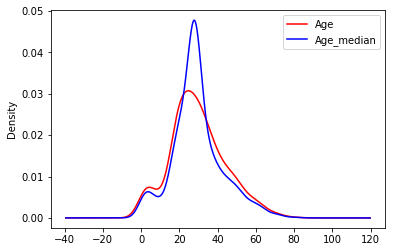

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax, color = 'red')
df1.Age_median.plot(kind = 'kde', ax=ax, color = 'blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

# Advantages And Disadvantages of Mean/Median Imputation

Advantages

1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset #### Disadvantages
3. Change or Distortion in the original variance
4. Impacts Correlation

# Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [28]:
df2 = pd.read_csv('Titanicdataset.csv', usecols = ['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [30]:
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

From above output clearly visualises that feature (Age) has more percentage of missing values.

In [31]:
df2.Age.isnull().sum()

177

In [32]:
df2['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

The above code prints output by droping Null values of feature Age.

In [34]:
df2['Age'].dropna().sample()

394    24.0
Name: Age, dtype: float64

The above code prints output with by taking the null values (from feature Age) with some sample value from available data(Age). That means in our out[34] index 394 which was actually null value now has taken value of 24.0 (24.0 is sample value selected by code from feature(Age) previous data).

In [35]:
df2['Age'].dropna().sample(df2['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
       ...  
396    31.00
452    30.00
395    22.00
882    22.00
821    27.00
314    43.00
622    20.00
204    18.00
60     22.00
731    11.00
81     29.00
676    24.50
433    17.00
378    20.00
174    56.00
624    21.00
642     2.00
157    30.00
427    19.00
698    49.00
179    36.00
24      8.00
630    80.00
458    50.00
49     18.00
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

The above code prints the output that where ever null values exist in feature(Age = 177 null values) there a sample of values has taken from data available.

In [36]:
def impute_nan(df2,variable,median):
    df2[variable+'_median'] = df2[variable].fillna(median)
    df2[variable+'_random'] = df2[variable]
    ##It will have the random sample to fill the na
    random_sample = df2[variable].dropna().sample(df2[variable].isnull().sum(),random_state = 0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df2[df2[variable].isnull()].index
    df2.loc[df2[variable].isnull(),variable+'_random']=random_sample ## wherever it is null by using loc opertion giving feature name there replacing with output of random_sample

In [37]:
df2['Age'].mean()

29.69911764705882

In [38]:
median = df2['Age'].median()

In [39]:
median

28.0

In [40]:
impute_nan(df2,'Age',median)

In [42]:
df2.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


From above output we can clearly visualize that for index 5, previously there was a null value and now it was replaced with median value in feature (Age_median), and in feature (Age_random) it was seleted a random value from data available.

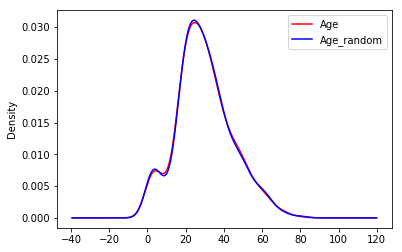

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['Age'].plot(kind = 'kde', ax = ax, color = 'red')
df2['Age_random'].plot(kind = 'kde', ax = ax, color = 'blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From above figure when compared with Mean/Medain/Mode plot in Random sample plot there was not so much variance in distortion.

# Advantages

1. Easy To implement
2. There is less distortion in variance

# Disadvantages

1. Every situation randomness wont work

# Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [45]:
df3 = pd.read_csv('Titanicdataset.csv', usecols = ['Age','Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [46]:
df3['Age_NAN']=np.where(df3['Age'].isnull(),1,0)
df3.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [49]:
median = df3['Age'].median()

In [50]:
df3['Age'].fillna(median, inplace=True)
df3.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In this imputation we had created aanother feature with replacing null values with 1 and another values with 0 as well as in age feature wherever null vaalues exists those were replaced with median values. 

# Advantages

1. Easy to implement
2. Captures the importance of missing values

# Disadvantages

1. Creating Additional Features(Curse of Dimensionality)

# End of Distribution Imputation

If there are suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of distribution of the variable.

In [51]:
df4 = pd.read_csv('Titanicdataset.csv', usecols = ['Age','Fare','Survived'])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


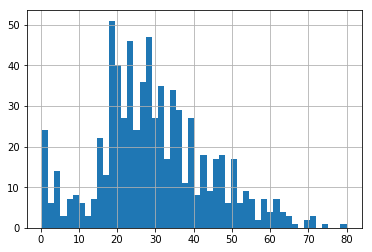

In [52]:
df4.Age.hist(bins=50)

In [53]:
extreme = df4.Age.mean()+3*df4.Age.std()

In [54]:
extreme

73.27860964406094

The above code explanation is that we are taking end of distribution value(that is out of third standard distribution(Meu+3)) from feature Age. Main aim for end of imputation is that whatever will be present at the end of distribution in +3 standard distribution that value i am taking here.

In [55]:
import seaborn as sns

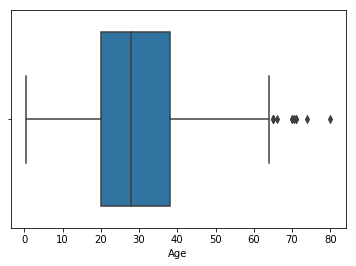

In [56]:
sns.boxplot('Age',data = df4)

From above fig its clearly visualises that there were some outliers present in the data.

In [57]:
def impute_nan(df4,variable,extreme):
    df4[variable+'_end_distribution'] = df4[variable].fillna(extreme)
    df4[variable].fillna(median, inplace = True)

In [58]:
impute_nan(df4,'Age',extreme)

In [59]:
df4.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


From above code the feature with Age_end_distribution is filled with extreme value where null value is present in Age feature

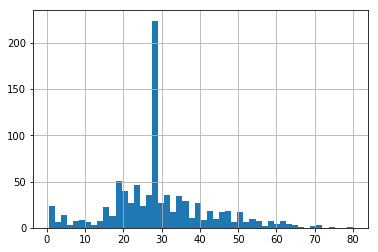

In [60]:
df4["Age"].hist(bins=50)

From above plot since we had replaced nan values with median now we are getting variance at value 28.0

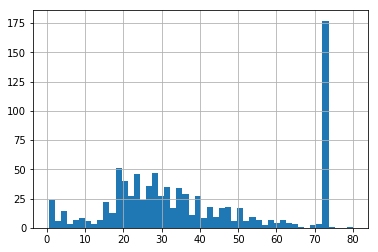

In [61]:
df4['Age_end_distribution'].hist(bins=50)

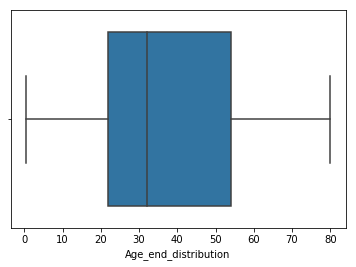

In [62]:
sns.boxplot("Age_end_distribution",data = df4)

From above boxplot now we don't have any outliers. Due to this End of Distribution we will get proper distribution of feature (Age). One main point is outlines are captured. This type of imputation helps in some type of data.

# Arbitary Imputation

This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df5 = pd.read_csv('Titanicdataset.csv', usecols = ['Survived','Fare','Age'])
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df5.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df5.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
def impute_nan(df,variable):
    df5[variable+'_Zero']=df5[variable].fillna(0)
    df5[variable+'_Hundred']=df5[variable].fillna(100)

In [7]:
impute_nan(df5,'Age')
df5.head(10)

,Survived,Age,Fare,Age_Zero,Age_Hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


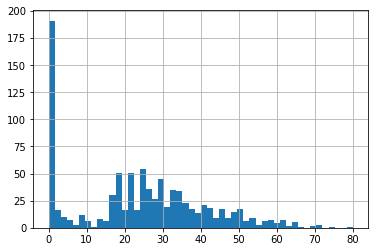

In [11]:
df5['Age_Zero'].hist(bins=50)

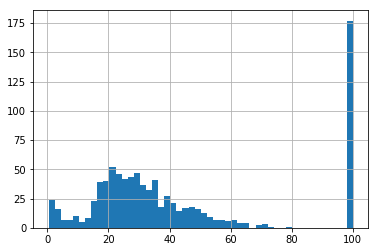

In [12]:
df5['Age_Hundred'].hist(bins=50)

#  Advantages

1. Easy to implement
2. Captures the importance of missingess if there is one

# Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

# Handling Categorical Missing Values

# Frequent Category Imputation

In [13]:
df6 = pd.read_csv('train.csv')
df6.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df6.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df6.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [16]:
df6.isnull().mode()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [19]:
df6 = pd.read_csv('train.csv', usecols=['LotFrontage','FireplaceQu','GarageType','GarageYrBlt','SalePrice'])
df6.head()

,LotFrontage,FireplaceQu,GarageType,GarageYrBlt,SalePrice
0,65.0,NaN,Attchd,2003.0,208500
1,80.0,TA,Attchd,1976.0,181500
2,68.0,TA,Attchd,2001.0,223500
3,60.0,Gd,Detchd,1998.0,140000
4,84.0,TA,Attchd,2000.0,250000


In [21]:
df6['LotFrontage'].isnull().sum()

259

In [22]:
df6['LotFrontage'].mode()[0]

60.0

In [23]:
df6['GarageType'].mode()[0]

'Attchd'

In [24]:
df6['FireplaceQu'].mode()[0]

'Gd'

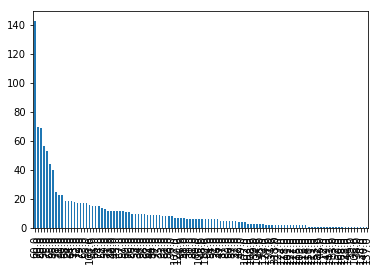

In [26]:
df6['LotFrontage'].value_counts().plot.bar()

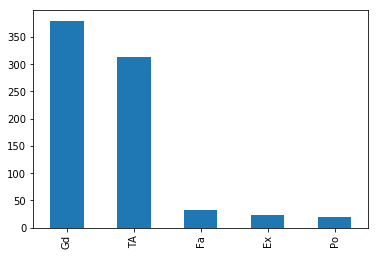

In [27]:
df6['FireplaceQu'].value_counts().plot.bar()

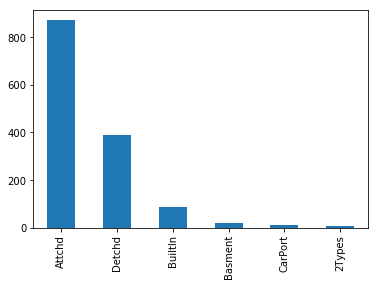

In [28]:
df6['GarageType'].value_counts().plot.bar()

In [31]:
def impute_nan(df,variable):
    most_frequent_category=df6[variable].mode()[0]
    df6[variable].fillna(most_frequent_category,inplace=True)

In [33]:
for feature in ['GarageType','FireplaceQu']:
    impute_nan(df6,feature)

In [35]:
df6.isnull().sum()

LotFrontage    259
FireplaceQu      0
GarageType       0
GarageYrBlt     81
SalePrice        0
dtype: int64

#  Advantages

1. Easy To implement
2. Fater way to implement 

# Disadvantages

1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

# Adding a Variable To Capture NAN

In [36]:
df7 = pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [40]:
df7['BsmtQualcap']=np.where(df7['BsmtQual'].isnull(),1,0)
df7['FireplaceQucap']=np.where(df7['FireplaceQu'].isnull(),1,0)
df7['GarageTypecap']=np.where(df7['GarageType'].isnull(),1,0)

In [41]:
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualcap,FireplaceQucap,GarageTypecap
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [46]:
Bsmtfreq = df7['BsmtQual'].mode()[0]

In [ ]:
Firefreq = df7['FireplaceQu'].mode()[0]

In [53]:
Firefreq

'Gd'

In [48]:
Garagefreq = df7['GarageType'].mode()[0]

In [51]:
df7['BsmtQual'].fillna(Bsmtfreq, inplace=True)
df7['FireplaceQu'].fillna(Firefreq, inplace=True)
df7['GarageType'].fillna(Garagefreq, inplace=True)

In [52]:
df7.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualcap,FireplaceQucap,GarageTypecap
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
5,Gd,Gd,Attchd,143000,0,1,0
6,Ex,Gd,Attchd,307000,0,0,0
7,Gd,TA,Attchd,200000,0,0,0
8,TA,TA,Detchd,129900,0,0,0
9,TA,TA,Attchd,118000,0,0,0


# Suppose if you have more frequent categories, we just replace NAN with a new category

In [54]:
df8 = pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df8.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [55]:
df8['BsmtQual_var']=np.where(df8['BsmtQual'].isnull(),'Missing',df8['BsmtQual'])

In [56]:
df8['FireplaceQu_var']=np.where(df8['FireplaceQu'].isnull(),'Missing',df8['FireplaceQu'])

In [57]:
df8['GarageType_var']=np.where(df8['GarageType'].isnull(),'Missing',df8['GarageType'])

In [58]:
df8.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


# Handle Categorical Features 

# One Hot Encoding

In [61]:
df9 = pd.read_csv('Titanicdataset.csv', usecols=['Sex'])
df9.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [63]:
pd.get_dummies(df9)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [64]:
df10 = pd.read_csv('Titanicdataset.csv', usecols = ['Embarked'])
df10.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [65]:
df10['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
df10.dropna(inplace=True)

In [67]:
pd.get_dummies(df10).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


# Disadvantages

1. One Hot encoding creates more number of extra features.
2. It may leads to curse of dimensionality(due to lot of features)

# One hot encoding with many categories in feature

In [68]:
df11 = pd.read_csv('Mercedesdata.csv', usecols=['X0','X1','X2','X3','X4','X5','X6'])
df11.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [69]:
df11['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [70]:
df11['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
aw     16
l      16
ad     14
k      11
au     11
b      11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ab      1
ac      1
g       1
Name: X0, dtype: int64

From above output as there were many no of categories in one feature if we do one hot encoding then dataset leads with many features.

As we know in one competition called KDD Orange one company has one the prize by proving when there were many no of categories in one feature then the frequent of top 10 were taken into account by leaving other categories.

Here also we will proceed with same example...

In [72]:
df11.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [73]:
lst_10 = df11.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [74]:
lst_10 = list(lst_10)

In [75]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [77]:
for categories in lst_10:
    df11[categories]=np.where(df11['X1']==categories,1,0)

In [78]:
lst_10.append('X1')

In [79]:
df11[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
5,0,0,1,0,0,0,0,0,0,0,b
6,0,0,0,0,0,1,0,0,0,0,r
7,0,0,0,1,0,0,0,0,0,0,l
8,0,1,0,0,0,0,0,0,0,0,s
9,0,0,1,0,0,0,0,0,0,0,b


#  Ordinal number encoding

In [80]:
import datetime

In [81]:
today_date = datetime.datetime.today()

In [82]:
today_date

datetime.datetime(2020, 8, 16, 13, 16, 53, 683279)

In [84]:
today_date-datetime.timedelta(3)

datetime.datetime(2020, 8, 13, 13, 16, 53, 683279)

In [85]:
## List Compression
days = [today_date-datetime.timedelta(i) for i in range(0,15)]

In [86]:
data = pd.DataFrame(days)
data.columns = ['Day']

In [87]:
data.head()

,Day
0,2020-08-16 13:16:53.683279
1,2020-08-15 13:16:53.683279
2,2020-08-14 13:16:53.683279
3,2020-08-13 13:16:53.683279
4,2020-08-12 13:16:53.683279


In [89]:
data['weekday']= data['Day'].dt.weekday_name
data.head()

,Day,weekday
0,2020-08-16 13:16:53.683279,Sunday
1,2020-08-15 13:16:53.683279,Saturday
2,2020-08-14 13:16:53.683279,Friday
3,2020-08-13 13:16:53.683279,Thursday
4,2020-08-12 13:16:53.683279,Wednesday


In [90]:
dictionary = {'Monday' : 1, 'Tuesday' : 2, 'Wednesday' : 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6, 'Sunday' : 7}
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [91]:
data['weekday_ordinal'] = data['weekday'].map(dictionary)

In [92]:
data.head()

,Day,weekday,weekday_ordinal
0,2020-08-16 13:16:53.683279,Sunday,7
1,2020-08-15 13:16:53.683279,Saturday,6
2,2020-08-14 13:16:53.683279,Friday,5
3,2020-08-13 13:16:53.683279,Thursday,4
4,2020-08-12 13:16:53.683279,Wednesday,3


This technique is used when there is usage of like ranking kind of thing or ordinal kind of thing for your dataset.

# Count or Frequency Encoding 

In [93]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
columns = [1,3,5,6,7,8,9,13]

In [96]:
train_set = train_set[columns]

In [97]:
train_set.columns = ['Employment','Degree','MartialStatus','Designation','Familyjob','Race','Sex','Country']

In [98]:
train_set.head()

,Employment,Degree,MartialStatus,Designation,Familyjob,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [99]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
MartialStatus : 7 labels
Designation : 15 labels
Familyjob : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [100]:
country_map=train_set['Country'].value_counts().to_dict()

In [101]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,MartialStatus,Designation,Familyjob,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


# Advantages

1. Easy To Use
2. Not increasing feature space 

# Disadvantages

1. It will provide same weight if the frequencies are same
2. Target Guided Ordinal Encoding
3. Ordering the labels according to the target
4. Replace the labels by the joint probability of being 1 or 0

# Target Guided Ordinal Encoding

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [102]:
df12 = pd.read_csv('Titanicdataset.csv', usecols = ['Cabin','Survived'])
df12.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [104]:
df12['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [105]:
df12['Cabin'].fillna('Missing',inplace = True)

In [107]:
df12['Cabin'] = df12['Cabin'].astype(str).str[0]
df12.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [108]:
df12['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [109]:
df12.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [110]:
ordinal_labels = df12.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [111]:
enumerate(ordinal_labels,0)

In [112]:
ordinal_labels2 = {k:i for i, k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [113]:
df12['Cabin_ordinal_labels'] = df12['Cabin'].map(ordinal_labels2)
df12.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding 

In [115]:
mean_ordinal=df12.groupby(['Cabin'])['Survived'].mean().to_dict()

In [116]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [119]:
df12['mean_ordinal_encode']=df12['Cabin'].map(mean_ordinal)
df12.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability Ratio Encoding

1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. Replace with the categorical feature

In [1]:
import pandas as pd

In [2]:
df13 = pd.read_csv('Titanicdataset.csv')
df13.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [3]:
df13.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12'],
      dtype='object')

In [4]:
df13 = df13.drop(['Unnamed: 12'], axis=1)
df13.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df13 = df13.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], axis = 1)
df13.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [6]:
df13.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [8]:
df13['Cabin'].fillna('Missing', inplace = True)
df13.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [9]:
df13['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [10]:
df13['Cabin'] = df13['Cabin'].astype(str).str[0]
df13.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [11]:
df13['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [12]:
prob_df = df13.groupby(['Cabin'])['Survived'].mean()
prob_df.head()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
Name: Survived, dtype: float64

In [13]:
prob_df = pd.DataFrame(prob_df)
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [14]:
prob_df['Died'] = 1-prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [15]:
prob_df['Probability_ratio'] = prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [16]:
probability_encoded = prob_df['Probability_ratio'].to_dict()

In [17]:
df13['Cabin_encoded'] = df13['Cabin'].map(probability_encoded)
df13.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


# Transformation of Features

Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

0-255 pixels

# Types Of Transformation

1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation

# Standardization

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [18]:
df14 = pd.read_csv('Titanicdataset.csv', usecols = ['Survived','Pclass','Age','Fare'])
df14.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [20]:
df14.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [21]:
median = df14.Age.median()

In [22]:
median

28.0

In [23]:
df14['Age'].fillna(median, inplace = True)
df14.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [24]:
df14.isnull().mean()

Survived    0.0
Pclass      0.0
Age         0.0
Fare        0.0
dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler # Mean = 0 , Standard deviation = 1

In [26]:
scaler = StandardScaler()

In [28]:
scaled_data = scaler.fit_transform(df14)
pd.DataFrame(scaled_data)

D:\Anaconda\envs\pytorchenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\envs\pytorchenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
5,-0.789272,0.827377,-0.104637,-0.478116
6,-0.789272,-1.566107,1.893459,0.395814
7,-0.789272,0.827377,-2.102733,-0.224083
8,1.266990,0.827377,-0.181487,-0.424256
9,1.266990,-0.369365,-1.180535,-0.042956


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
scaled_data

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

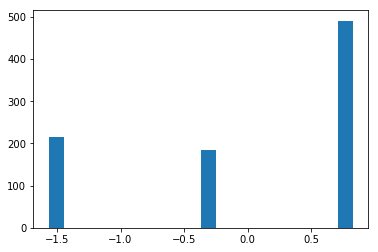

In [31]:
plt.hist(scaled_data[:,1], bins =20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

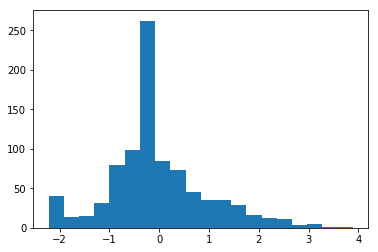

In [32]:
plt.hist(scaled_data[:,2], bins =20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

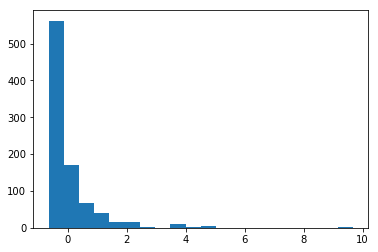

In [33]:
plt.hist(scaled_data[:,3], bins =20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

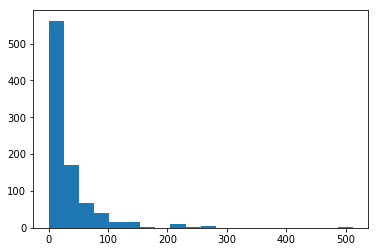

In [37]:
plt.hist(df14['Fare'], bins = 20) # Since Fare plot is right skewed there were outliers in Fare feature.

{'whiskers': [<matplotlib.lines.Line2D at 0x2a0ff6cc50>,
 'caps': [<matplotlib.lines.Line2D at 0x2a0ff76320>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0ff6cb00>],
 'medians': [<matplotlib.lines.Line2D at 0x2a0ff769b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a0ff76cf8>],
 'means': []}

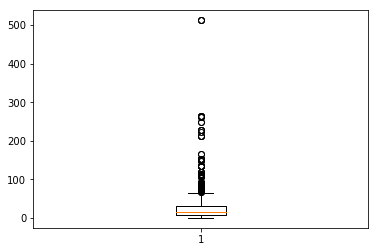

In [36]:
plt.boxplot(df14['Fare']) # This figure was example to say that there were outliers in Fare feature of df14

{'whiskers': [<matplotlib.lines.Line2D at 0x2a10049c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2a10053358>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a10049b38>],
 'medians': [<matplotlib.lines.Line2D at 0x2a100539e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a10053d30>],
 'means': []}

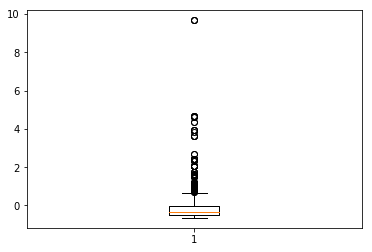

In [38]:
plt.boxplot(scaled_data[:,3])

# Min Max Scaling (### CNN)---Deep Learning Techniques
 
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_max = MinMaxScaler()

In [41]:
df15 = pd.read_csv('Titanicdataset.csv', usecols = ['Survived','Pclass','Age','Fare'])
df15.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [44]:
Scaled_data = min_max.fit_transform(df15)
Scaled_data

D:\Anaconda\envs\pytorchenv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        ,        nan, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [45]:
pd.DataFrame(Scaled_data)

,0,1,2,3
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
5,0.0,1.0,NaN,0.016510
6,0.0,0.0,0.673285,0.101229
7,0.0,1.0,0.019854,0.041136
8,1.0,1.0,0.334004,0.021731
9,1.0,0.5,0.170646,0.058694


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

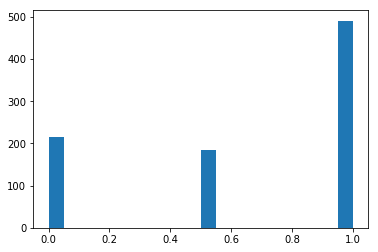

In [47]:
plt.hist(Scaled_data[:,1], bins = 20)

D:\Anaconda\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

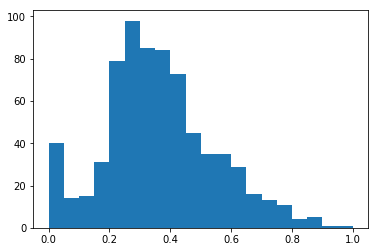

In [48]:
plt.hist(Scaled_data[:,2], bins =20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

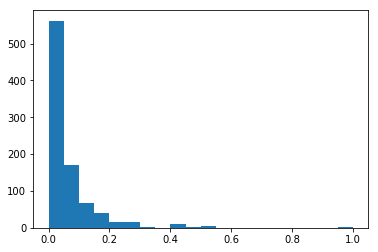

In [50]:
plt.hist(Scaled_data[:,3], bins = 20)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

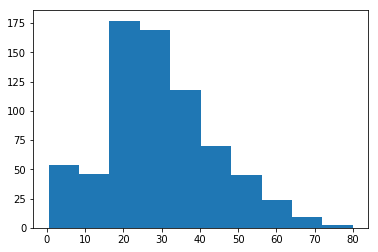

In [51]:
plt.hist(df15['Age'])

#  Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile(75%) - 25th quantile(25%)

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [52]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [54]:
Robust_scaler = pd.DataFrame(scaler.fit_transform(df15), columns = df15.columns)
Robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


D:\Anaconda\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-1.54293706, -1.09773427, -0.65253147, -0.20732867,  0.23787413,
         0.68307692,  1.12827972,  1.57348252,  2.01868531,  2.46388811,
         2.90909091]),
 <a list of 10 Patch objects>)

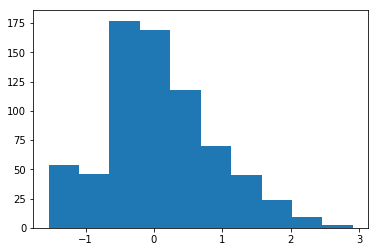

In [55]:
plt.hist(Robust_scaler['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  1.59286952,  3.81174382,  6.03061811,  8.24949241,
        10.46836671, 12.68724101, 14.90611531, 17.12498961, 19.3438639 ,
        21.5627382 ]),
 <a list of 10 Patch objects>)

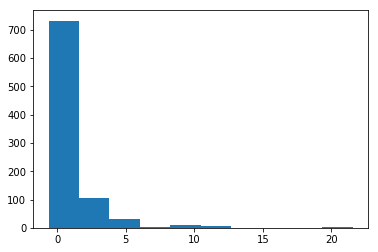

In [56]:
plt.hist(Robust_scaler['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a105a0dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a105ae4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a105a0c88>],
 'medians': [<matplotlib.lines.Line2D at 0x2a105aeb38>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a105aee80>],
 'means': []}

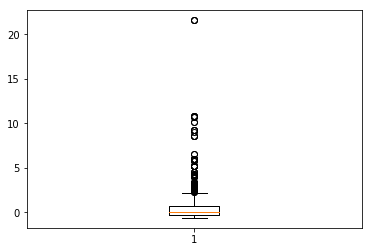

In [58]:
plt.boxplot(Robust_scaler['Fare']) # There will be outliers of this plot since previous output is right side skewed

# Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

1. logarithmic transformation
2. Reciprocal transformation
3. Square root transformation
4. Exponential transformation (more general, you can use any exponent)
5. Boxcox transformation

In [60]:
df16 = pd.read_csv('Titanicdataset.csv', usecols = ['Age','Fare','Survived'])
df16.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
df16.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [62]:
median = df16['Age'].median()

In [63]:
median

28.0

In [64]:
df16['Age'].fillna(median, inplace = True)
df16.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [65]:
df16.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [66]:
import scipy.stats as stat
import pylab

In [79]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df16,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) # subplot at fist row first column and at first index
    df16[feature].hist()
    plt.subplot(1,2,2) # subpolt at first row second column and at second index
    stat.probplot(df16[feature],dist='norm',plot=pylab) # norm = normalization
    plt.show()

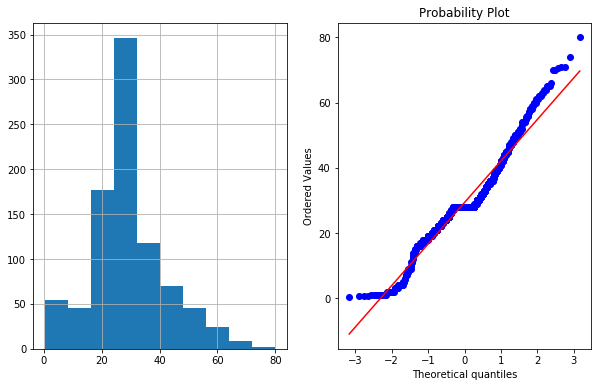

In [80]:
plot_data(df16,'Age') # From below probability plot if all points fall in straight line then we can tell that Age feature is normal or guassian distributed

# Logarithmic Transformation

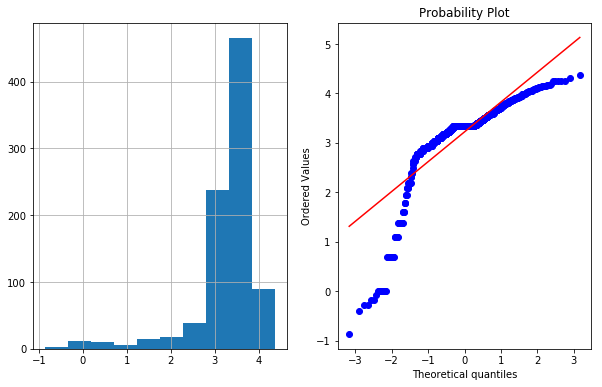

In [69]:
import numpy as np
df16['Age_log']=np.log(df16['Age'])
plot_data(df16,'Age_log')

# Reciprocal Transformation

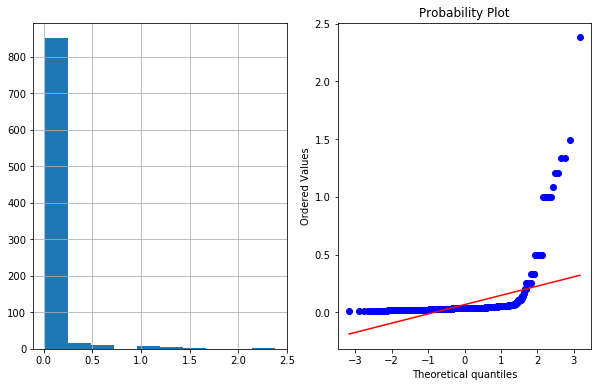

In [70]:
df16['Age_reciprocal']=1/df16.Age
plot_data(df16,'Age_reciprocal')

# Square Root Transformation

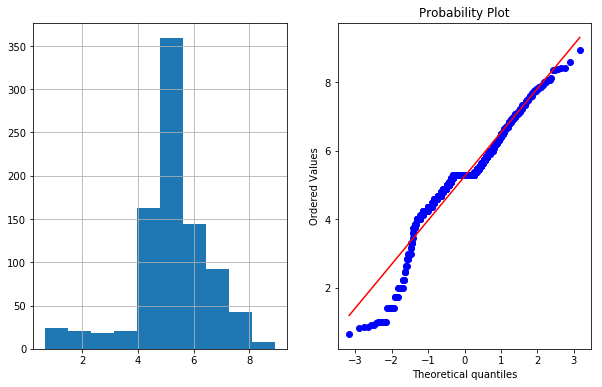

In [71]:
df16['Age_sqaure']=df16.Age**(1/2)
plot_data(df16,'Age_sqaure')

# Exponential Transformation

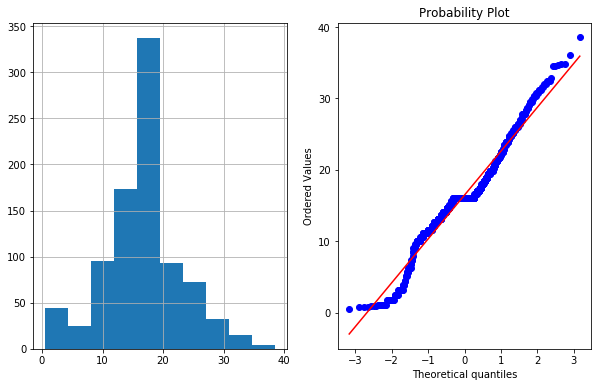

In [72]:
df16['Age_exponential']=df16.Age**(1/1.2)
plot_data(df16,'Age_exponential')

# BoxCOx Transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [73]:
df16['Age_Boxcox'],parameters=stat.boxcox(df16['Age'])

In [74]:
print(parameters)

0.7964531473656952


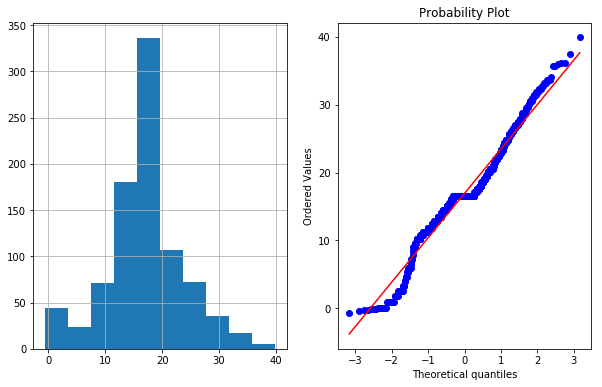

In [75]:
plot_data(df16,'Age_Boxcox')

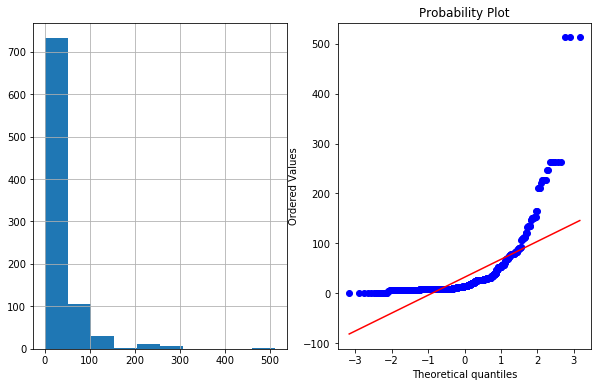

In [76]:
plot_data(df16,'Fare')

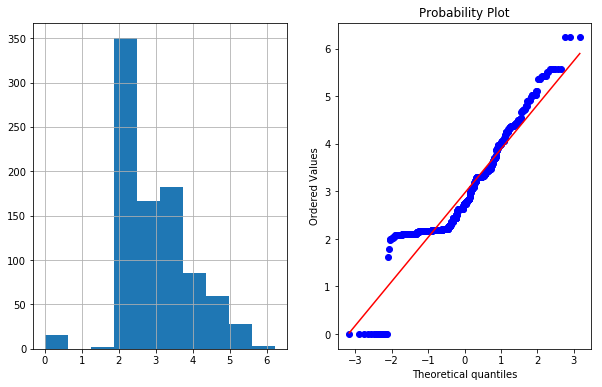

In [77]:
#### Fare
df16['Fare_log']=np.log1p(df16['Fare'])
plot_data(df16,'Fare_log')

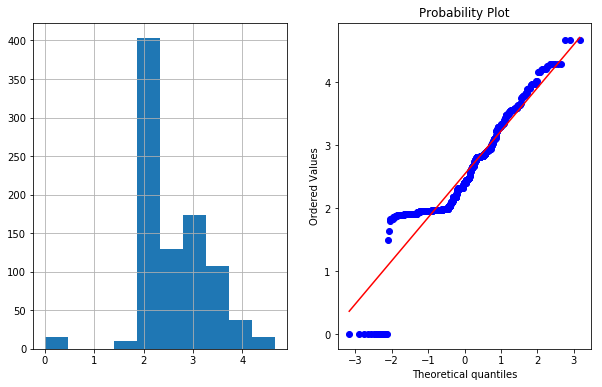

In [78]:
df16['Fare_Boxcox'],parameters=stat.boxcox(df16['Fare']+1)
plot_data(df16,'Fare_Boxcox')